<a href="https://colab.research.google.com/github/brunatoloti/quarentena-dados/blob/master/exercicios/aula_e_desafio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 2 - Medias, Medianas e Visualização de Dados

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv('drive/My Drive/Estudos Python/QuarentenaDados - Alura/dados/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('drive/My Drive/Estudos Python/QuarentenaDados - Alura/dados/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Usando o barplot do Seaborn

In [ ]:
unique_genres = pd.DataFrame(movies['genres'].str.split("|").to_list()).stack()
unique_genres = unique_genres.reset_index()
unique_genres = unique_genres.drop(columns=['level_0','level_1'])
unique_genres.columns = ['genre']
genres = unique_genres['genre'].unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [ ]:
genres_quantity = unique_genres['genre'].value_counts()
genres_quantity

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genre, dtype: int64

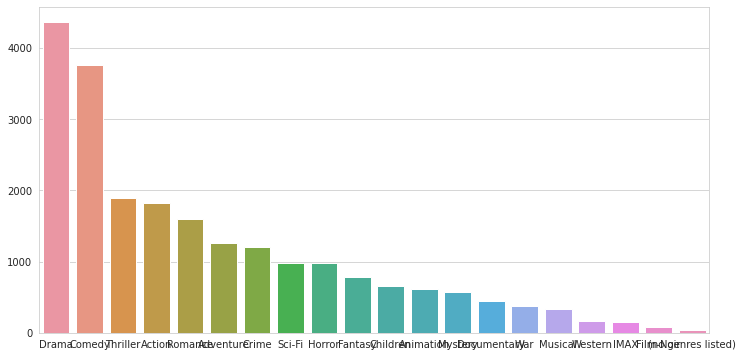

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=genres_quantity.index, y=genres_quantity.values)
plt.show()

Mudando a palette do nosso gráfico para que fique em uma palette sequencial. Também, não esquecendo de colocar o número de cores que você quer, dado que por default é 6, logo ela vai se repetindo pelo gráfico (Não queremos isso!)

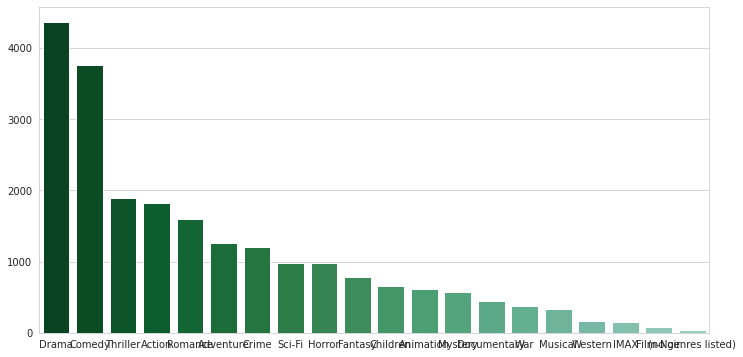

In [ ]:
sns.set_style("whitegrid") #colocar as linhas horizontais para facilitar a visualização
plt.figure(figsize=(12,6))
sns.barplot(x=genres_quantity.index, y=genres_quantity.values, palette=sns.color_palette("BuGn_r",n_colors=len(genres_quantity) + 12)) #esse +12 é uma gambiarra para que os últimos não fiquem tão claros
plt.show()

Printando a nota média do filme de Id igual a 1 e a sua respectiva distribuição de notas

3.9209302325581397


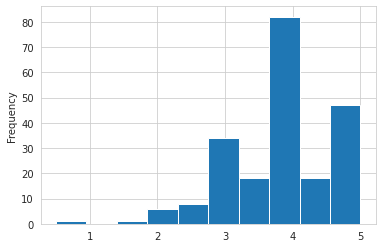

In [ ]:
rating_movie1 = ratings.query("movieId == 1")['rating']
print(rating_movie1.mean())
rating_movie1.plot(kind='hist')

Fazendo o mesmo com o filme 2

3.4318181818181817


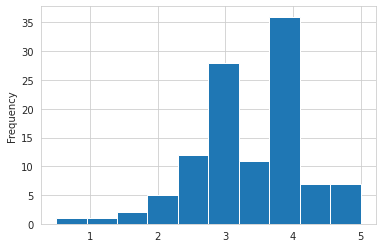

In [ ]:
rating_movie2 = ratings.query("movieId == 2")['rating']
print(rating_movie2.mean())
ratings.query("movieId == 2")['rating'].plot(kind='hist')

Como a média pode se fazer uma medida perigosa, devemos, dependendo da distribuição dos nossos dados, medir a centralidade dos mesmos de uma maneira diferente da média. Lembra que Justice League: Doom tinha média 5, mas apenas uma pessoa havia votado nele? Então, esse é um dos exemplos da periculosidade da média como medida de centralidade dependendo da distribuição dos dados. A média não conta a história por trás dos dados, por isso pode ser tão perigosa.

Vejamos, então, a medida de centralidade Mediana, a qual é o valor que separa a metade maior e a metade menor de uma amostra, ou seja, a Mediana pode ser o valor do meio de um conjunto de dados.

In [ ]:
#Descrição estatística do Filme de Id 1, Toy Story
rating_movie1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [ ]:
#Descrição estatística do Filme de Id 2, Jumanji
rating_movie2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [ ]:
#Descrição estatística do Filme de Id 102084, Justice League: Doom
rating_movie102084 = ratings.query("movieId == 102084")['rating']
rating_movie102084.describe()

count    1.0
mean     5.0
std      NaN
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: rating, dtype: float64

In [ ]:
mean_ratings = ratings.groupby('movieId')['rating'].mean()
movies_with_mean = movies.join(mean_ratings, on='movieId')
movies_with_mean = movies_with_mean.rename(columns={'rating': 'mean_rating'})

count_rating = ratings.groupby('movieId')['rating'].count()

movies_with_mean_count = movies_with_mean.join(count_rating, on='movieId')
movies_with_mean_count = movies_with_mean_count.rename(columns={'rating':'quantity_rating'})
movies_with_mean_count['mean_rating'] = round(movies_with_mean_count['mean_rating'],2)
movies_with_mean_count.head()

,movieId,title,genres,mean_rating,quantity_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


In [ ]:
movies_with_mean_count.sort_values('mean_rating', ascending=False)[7500:7600]

,movieId,title,genres,mean_rating,quantity_rating
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,2.71,53.0
1466,1991,Child's Play (1988),Horror|Thriller,2.71,12.0
6693,58293,"10,000 BC (2008)",Adventure|Romance|Thriller,2.71,17.0
1811,2411,Rocky IV (1985),Action|Drama,2.71,29.0
1548,2084,Newsies (1992),Children|Musical,2.70,5.0
...,...,...,...,...,...
1605,2147,"Clan of the Cave Bear, The (1986)",Adventure|Drama|Fantasy,2.67,3.0
9181,149352,Daddy's Home (2015),Comedy,2.67,6.0
4017,5678,Formula 51 (2001),Action|Comedy|Crime|Thriller,2.67,3.0
166,196,Species (1995),Horror|Sci-Fi,2.67,45.0


Vamos fazer uma função que nos retorne o histograma da distribuição de notas e o describe do filme cujo Id passamos como parâmetro.

In [ ]:
def plot_movie(n):
  rating_movie = ratings.query(f"movieId =={n}")['rating']
  rating_movie.plot(kind='hist')
  print(rating_movie.describe())

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64


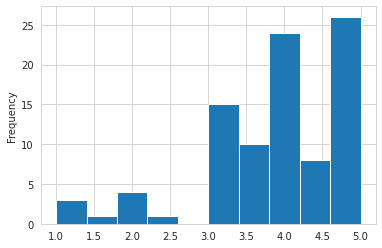

In [ ]:
plot_movie(919) #Mágico de Oz

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64


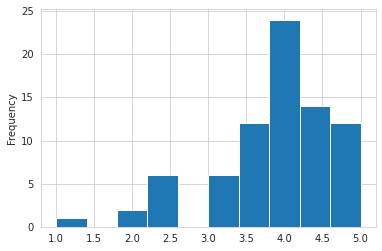

In [ ]:
plot_movie(46578) #Little Miss Sunshine

Note que, Mágico de Oz e Little Miss Sunshine possuem médias muito próximas, mas perceba diferença nos gráficos! Perceba a diferença nas distribuições dos dados desses dois filmes!

Portanto, podemos ver que é muito interessante tomar outras medidas de centralidade e não apenas a média!

Há outras maneiras de ver distribuição das notas do que apenas o gráfico de histograma. Há um outro tipo de gráfico que nos permite comparar a mediana e a distribuição inteira de maneira mais eficiente. Estamos falando do gráfico boxplot.

In [ ]:
def boxplot_movie(n):
  rating_movie = ratings.query(f"movieId =={n}")['rating']
  rating_movie.plot(kind='hist')
  plt.show()
  rating_movie.plot.box()
  plt.show()
  print(rating_movie.describe())

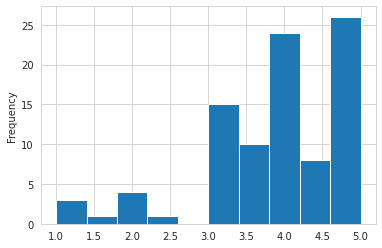

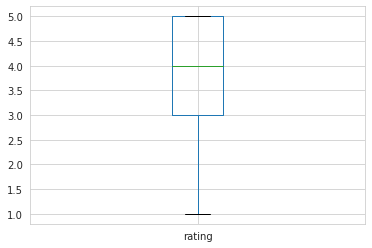

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(919)

Nesse gráfico boxplot, comparando com o describe, conseguimos ver que: a mediana é 4.0 (linha verde no meio do retângulo), a maioria dos valores se encontram entre 3.0 e 5.0 (o retângulo propriamente dito), o valor mínimo se encontra no 1.0 e o valor máximo se encontra no 5.0. (Explicar dessa forma, pode não ser correta para todos os casos, pois essas interpretações do gráfico não são de acordo com alguma definição matemática).

Vejamos isso para o filme Toy Story

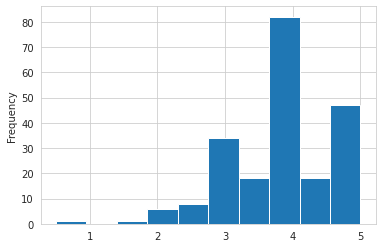

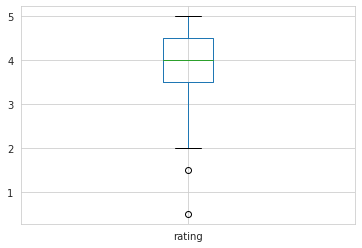

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(1)

Repare que aquela explicação não pode ser aplicada a esse boxplot aqui, dado que possuímos esses pontos abaixo do número 2. O que podemos explicar aqui: 2 não é o mínimo, o 2 é o que ele considera sendo, na maioria das notas dessa amostra, a pior nota dada e as notas abaixo de 2 são consideradas outliers (quase ninguém colocou, mas houve ocorrência; um ponto fora da curva)

Usando o boxplot da biblioteca seaborn e aplicando para 4 filmes diferentes. Assim, conseguimos comparar as distribuições desses filmes de maneira mais fácil.

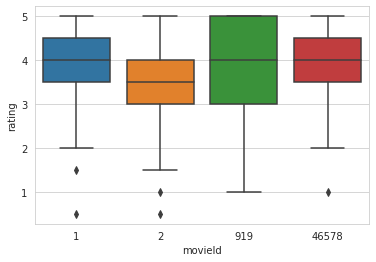

In [ ]:
sns.boxplot(data=ratings.query("movieId in [1,2,919,46578]"), x="movieId", y="rating")

##Desafios - Aula 2

Desafio 1: Rotacionar os thicks do gráfico

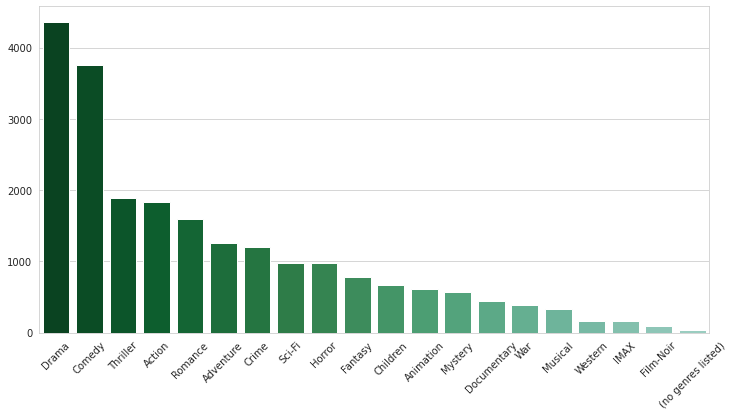

In [ ]:
sns.set_style("whitegrid") #colocar as linhas horizontais para facilitar a visualização
plt.figure(figsize=(12,6))
plt.xticks(rotation=45) #Rotacionar os thicks do gráfico em 45 graus
sns.barplot(x=genres_quantity.index, y=genres_quantity.values,
            palette=sns.color_palette("BuGn_r",n_colors=len(genres_quantity) + 12)) #esse +12 é uma gambiarra para que os últimos não fiquem tão claros
plt.show()

Desafio 2: Comparar outros filmes com notas médias próximas e achar distribuições bem diferentes

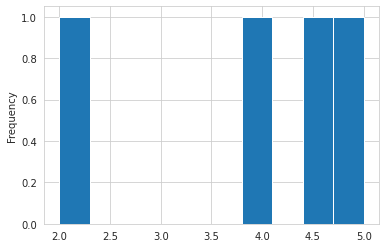

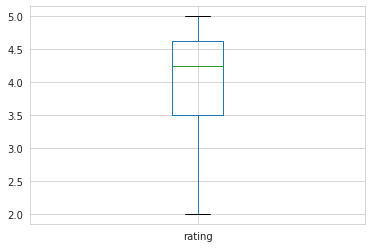

count    4.000000
mean     3.875000
std      1.314978
min      2.000000
25%      3.500000
50%      4.250000
75%      4.625000
max      5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(127108) #Brooklin

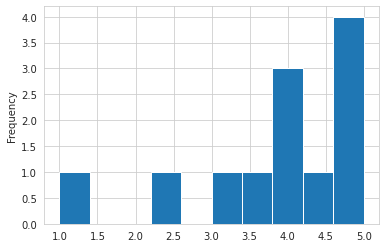

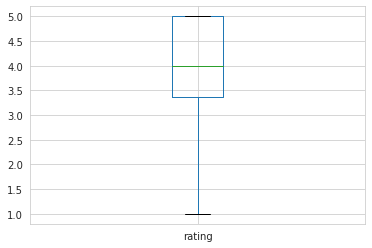

count    12.000000
mean      3.875000
std       1.227062
min       1.000000
25%       3.375000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(187593) #Deadpool 2

Brooklin e Deadpool 2 possuem poucas avaliações, mas possuem a mesma nota média: 3.875. Porém, conseguimos ver tanto pelos seus respectivos histogramas quanto pelos seus describes as grandes diferenças que eles têm entre si. Por exemplo, Brooklin possui mediana de 4.25, enquanto que Deadpool 2 possui 4.0. Além disso, Brooklin possui nota mínima igual a 2.0, enquanto que Deadpool 2 possui 1.0. Dentre outras diferenças.

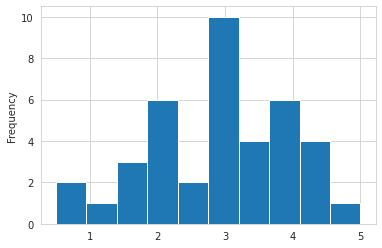

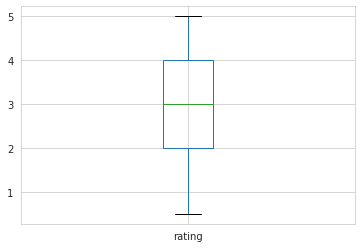

count    39.000000
mean      2.935897
std       1.142363
min       0.500000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(4148) #Hannibal

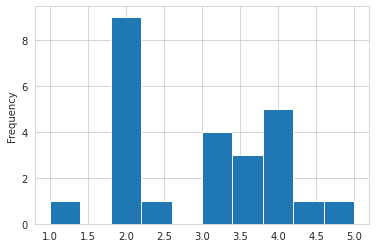

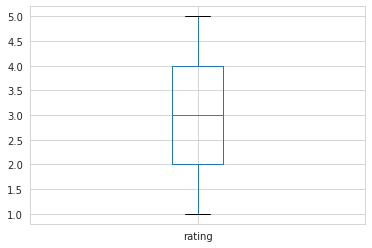

count    25.000000
mean      2.940000
std       1.023882
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(1590) #Event Horizon

Hannibal e Event Horizon possuem a mesma média (arredondada): 2.94. Porém, possuem uma distribuição de dados bem diferente

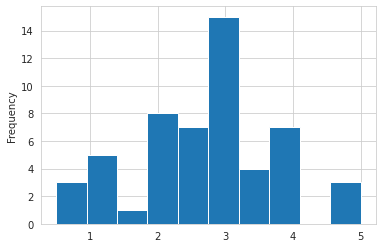

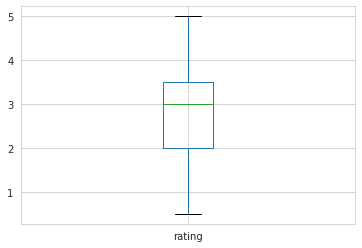

count    53.000000
mean      2.707547
std       1.128452
min       0.500000
25%       2.000000
50%       3.000000
75%       3.500000
max       5.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(673) #Space Jam

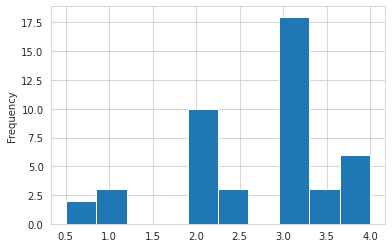

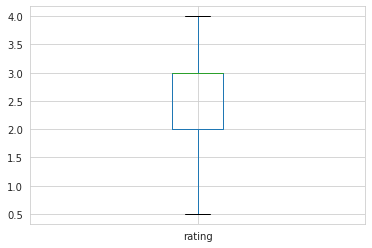

count    45.000000
mean      2.666667
std       0.917011
min       0.500000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: rating, dtype: float64


In [ ]:
boxplot_movie(196) #Species

Space Jam e Species não possuem médias exatamente iguais, mas possuem médias quase iguais. Porém, perceba que possuem distribuições bem diferentes!

Desafio 3: Criar o boxplot dos 10 filmes com mais votos

In [ ]:
movies_10 = list(movies_with_mean_count.sort_values("quantity_rating", ascending=False)['movieId'].head(10))
movies_10 #Lista dos Ids dos 10 filmes que mais possuem votos

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]

In [ ]:
movies_10_votes = ratings[ratings["movieId"].isin(movies_10)] #Filtragem do dataframe ratings para pegarmos apenas as infos desses filmes

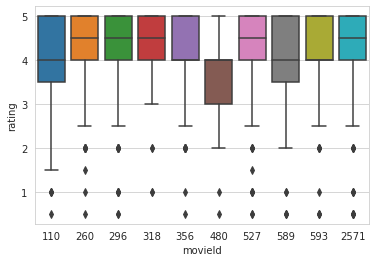

In [ ]:
sns.boxplot(data=movies_10_votes, x="movieId", y="rating")

Desafio 4: Deixar o boxplot
 num tamanho adequado e com os nomes dos filmes nos ticks

In [ ]:
movies_10_votes = pd.merge(movies_10_votes, movies, on='movieId')

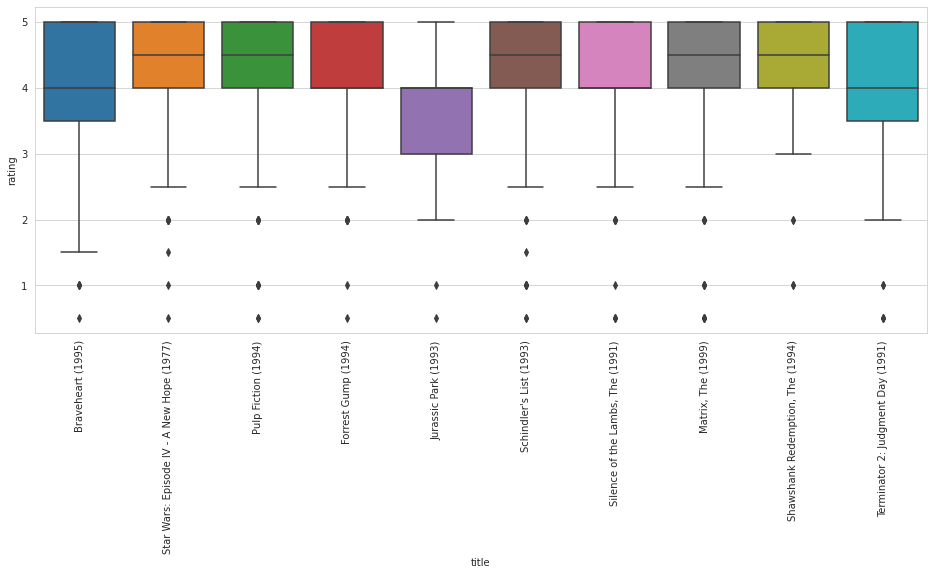

In [ ]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.boxplot(data=movies_10_votes, x="title", y="rating")

Desafio 5: Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [ ]:
import statistics

In [ ]:
def calculate(movie_id):
  mean_rating = ratings.query(f"movieId == {movie_id}")['rating'].mean()
  print(f"A média do filme de Id igual a {movie_id} é: {mean_rating}")
  median_rating = ratings.query(f"movieId == {movie_id}")['rating'].median()
  print(f"A mediana do filme de Id igual a {movie_id} é: {median_rating}")
  mode_rating = statistics.mode(ratings.query(f"movieId == {movie_id}")['rating'])
  print(f"A moda do filme de Id igual a {movie_id} é: {mode_rating}")

In [ ]:
calculate(2)

A média do filme de Id igual a 2 é: 3.4318181818181817
A mediana do filme de Id igual a 2 é: 3.5
A moda do filme de Id igual a 2 é: 4.0


Desafio 6: Plotar o boxplot e o histograma um do lado do outro (no mesma figura ou em figuras distintas)

In [ ]:
def challenge_plot(n):
  fig, axs = plt.subplots(ncols=2)
  rating_movie = ratings.query(f"movieId =={n}")['rating']
  rating_movie.plot(kind='hist', ax=axs[0])
  rating_movie.plot.box(ax=axs[1])

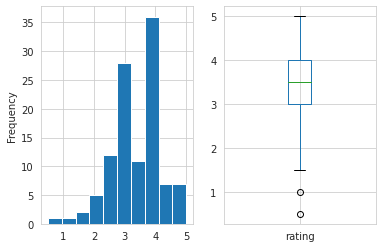

In [ ]:
challenge_plot(2)

Desafio 7: Gráfico de notas médias por ano

In [ ]:
movies_with_mean_year = movies_with_mean
movies_with_mean_year['year'] = movies_with_mean['title'].str.extract("\((\d{4})\)") #extrair os 4 numeros para a nova coluna year
movies_with_mean_year.head()

,movieId,title,genres,mean_rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


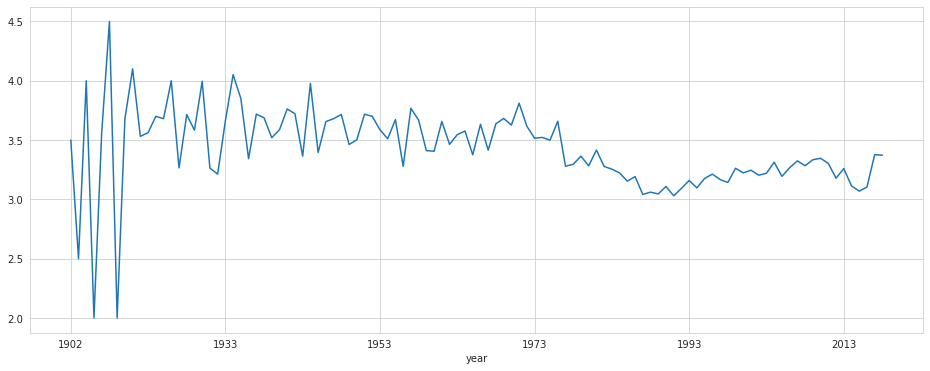

In [ ]:
graph_movies_year = movies_with_mean_year.groupby('year')['mean_rating'].mean()
plt.figure(figsize=(16,6))
graph_movies_year.plot()